# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# environment settings
pd.set_option('display.max_column', 400)
pd.set_option('display.max_colwidth', 400)

In [2]:
# load messages dataset
messages = pd.read_csv('../data/messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct


In [3]:
# check data types and missing values
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26248 non-null  int64 
 1   message   26248 non-null  object
 2   original  10184 non-null  object
 3   genre     26248 non-null  object
dtypes: int64(1), object(3)
memory usage: 820.4+ KB


In [4]:
# understand distributiojn of message genre
messages.genre.value_counts()

genre
news      13068
direct    10782
social     2398
Name: count, dtype: int64

In [5]:
# load categories dataset
categories = pd.read_csv('../data/categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;ea...
1,7,related-1;request-0;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-1;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-1;floods-0;storm-1;fire-0;ea...
2,8,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;ea...
3,9,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-1;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-1;infrastructure_related-1;transport-0;buildings-1;electricity-0;tools-0;hospitals-1;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;ea...
4,12,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;ea...


In [6]:
# check data types and missing values
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26248 non-null  int64 
 1   categories  26248 non-null  object
dtypes: int64(1), object(1)
memory usage: 410.2+ KB


### 2. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [7]:
# create a dataframe of the 36 individual category columns
categories = categories['categories'].str.split(';', expand=True).set_index(categories['id'])
categories.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
7,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-1,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
8,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
9,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-1,infrastructure_related-1,transport-0,buildings-1,electricity-0,tools-0,hospitals-1,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
12,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [8]:
# extract a list of new column names for categories.
category_colnames = list(categories.iloc[0,:].str.split('-').str[0])
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [9]:
# rename the columns of dataset `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
7,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-1,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
8,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
9,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-1,infrastructure_related-1,transport-0,buildings-1,electricity-0,tools-0,hospitals-1,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
12,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,water-0,food-0,shelter-0,clothing-0,money-0,missing_people-0,refugees-0,death-0,other_aid-0,infrastructure_related-0,transport-0,buildings-0,electricity-0,tools-0,hospitals-0,shops-0,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 3. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [10]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str[-1]
    
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column])
    
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4. Merge datasets.
- Merge the messages and categories datasets using the common 'id' index
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [11]:
# set id as index also in the messages dataset
messages.set_index('id', inplace=True)
messages

,message,original,genre
id,,,
2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct
9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct
12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct
...,...,...,...
30261,"The training demonstrated how to enhance micronutrient, protein and energy intake for meals using locally grown horticulture produce, rice and fish.",NaN,news
30262,A suitable candidate has been selected and OCHA Jakarta is currently working on her three month-contract starting on the 01st July 2005.,NaN,news
30263,"Proshika, operating in Cox's Bazar municipality and 5 other unions, Ramu and Chokoria, assessment, 5 kg rice, 1,5 kg lentils to 700 families.",NaN,news


In [12]:
# merge datasets
df = messages.merge(categories, on='id')
df.head()

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 5. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [13]:
# check number of duplicates
df.duplicated().sum()

171

In [14]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [15]:
# check number of duplicates were removed
assert (df.duplicated().sum()) == 0

In [16]:
# check for duplicated 'id'
df.index.duplicated().sum()

36

In [17]:
# display duplicated index records
df[df.index.duplicated(keep=False)]

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202,?? port au prince ?? and food. they need goverment aid and international aid thak you. god bless haiti,"p bay pap la syen ak manje. Yo bezwen ed gouvenman an ak d entenasyonal. Mesi, BonDye beni Ayiti.",direct,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
202,?? port au prince ?? and food. they need goverment aid and international aid thak you. god bless haiti,"p bay pap la syen ak manje. Yo bezwen ed gouvenman an ak d entenasyonal. Mesi, BonDye beni Ayiti.",direct,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
862,What is the address of the radio station? I ask because I need to drop off a file for the committee we created. Thanks in advance!,Ki adres radyo a? Paske m bezwen al depoze dosye ki bay detay sou komite nou fmea. Mesi davans!,direct,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
862,What is the address of the radio station? I ask because I need to drop off a file for the committee we created. Thanks in advance!,Ki adres radyo a? Paske m bezwen al depoze dosye ki bay detay sou komite nou fmea. Mesi davans!,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1652,"please we need water, food and tents, we have 101 chlidren. .. please come rescue","p jwen dlo, manje, tant pou nou demi nou gen 101 timoun vinn sove n",direct,1,1,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,"An EU-backed French offensive against rebels restored an uneasy order, but foreign donors have insisted on the elections before aid is resumed to Mali.",NaN,news,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28462,"To date, a total of 39 people suffering from Ebola or having had a high risk exposure to the virus, have been medically evacuated to Europe.",NaN,news,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28462,"To date, a total of 39 people suffering from Ebola or having had a high risk exposure to the virus, have been medically evacuated to Europe.",NaN,news,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# drop records with duplicated indexes
df = df[~df.index.duplicated(keep='first')]

In [19]:
assert (df.index.duplicated().sum()) == 0

In [20]:
df.head()

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 6. Check missing values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26179 entries, 2 to 30265
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   message                 26179 non-null  object
 1   original                10153 non-null  object
 2   genre                   26179 non-null  object
 3   related                 26179 non-null  int64 
 4   request                 26179 non-null  int64 
 5   offer                   26179 non-null  int64 
 6   aid_related             26179 non-null  int64 
 7   medical_help            26179 non-null  int64 
 8   medical_products        26179 non-null  int64 
 9   search_and_rescue       26179 non-null  int64 
 10  security                26179 non-null  int64 
 11  military                26179 non-null  int64 
 12  child_alone             26179 non-null  int64 
 13  water                   26179 non-null  int64 
 14  food                    26179 non-null  int64 
 15  shelter

In [22]:
# drop column 'original' as it contains over 50% missing values and are in foreign language
df.drop('original', inplace=True, axis=1)

In [23]:
# make sure column original no longer exist
assert sum(df.columns == 'original') == 0

### 6.EDA
Understand the distribution of each category

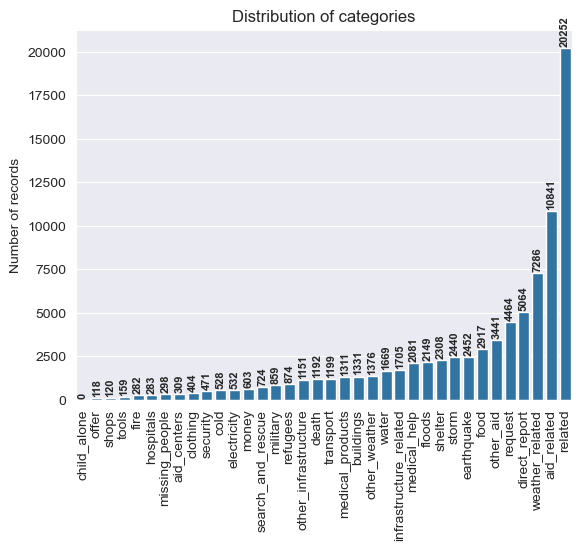

In [24]:
# plot how categories are distributed
df_sum = df.sum(numeric_only=True).sort_values(ascending=True)
ax = sns.barplot(data=df_sum)

# annotate
for c in ax.containers:
    # set the bar label based on the y-axis
    ax.bar_label(c, padding=1, fontsize=8, rotation=90, weight='bold')
        
plt.xticks(rotation=90)

plt.title('Distribution of categories')
plt.ylabel('Number of records')
plt.show()

> 'related' have a almost all of it's values set to 1, what does this mean ?
> category 'child_alone' have no records set to 1  ?

In [25]:
df.child_alone.value_counts()

child_alone
0    26179
Name: count, dtype: int64

> as category 'child_alone' have no category values == 1, lets drop this category.

In [26]:
df.drop('child_alone', inplace=True, axis=1)

In [27]:
# inspect records where related value is 0
df[df.related == 0].sum(numeric_only=True).sort_values(ascending=True)

related                   0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
infrastructure_related    0
aid_centers               0
weather_related           0
floods                    0
storm                     0
fire                      0
earthquake                0
cold                      0
other_infrastructure      0
other_weather             0
other_aid                 0
refugees                  0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
death                     0
security                  0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
military                  0
direct_report             0
dtype: int64

In [28]:
# inspect messages not related to a disaster
df[df.related == 0][:10]['message']

id
14                                                                    Information about the National Palace-
17                                                           I would like to receive the messages, thank you
21                                               I am in Petionville. I need more information regarding 4636
28                                       are you going to call me or do you want me to call ou? let me know?
30                                                            I don't understand how to use this thing 4636.
37                                                                        Can you tell me about this service
43                                       Good evening, Radio one please. I would like information on Tiyous.
45                                I'm here, I didn't find the person that I needed to send the pant by phone
67    I'm listening to you at Miraguan we asking the government to take change because one gallon gas is 80.
86              

> When related = 0, all categories are also 0, it thus mean the message is not related to a disaster

In [29]:
# Understand the distribution of 'related'
df.related.value_counts()

related
1    19876
0     6115
2      188
Name: count, dtype: int64

> Oeps, we have an invalid value = '2'

In [30]:
# inspect unique values of all category columns
df.nunique()

message                   26177
genre                         3
related                       3
request                       2
offer                         2
aid_related                   2
medical_help                  2
medical_products              2
search_and_rescue             2
security                      2
military                      2
water                         2
food                          2
shelter                       2
clothing                      2
money                         2
missing_people                2
refugees                      2
death                         2
other_aid                     2
infrastructure_related        2
transport                     2
buildings                     2
electricity                   2
tools                         2
hospitals                     2
shops                         2
aid_centers                   2
other_infrastructure          2
weather_related               2
floods                        2
storm   

In [31]:
for col in df.columns:
    if df[col].dtype == 'O':
        continue
    print(col)
    # set each value to be the last character of the string
    print(df[col].unique())

related
[1 0 2]
request
[0 1]
offer
[0 1]
aid_related
[0 1]
medical_help
[0 1]
medical_products
[0 1]
search_and_rescue
[0 1]
security
[0 1]
military
[0 1]
water
[0 1]
food
[0 1]
shelter
[0 1]
clothing
[0 1]
money
[0 1]
missing_people
[0 1]
refugees
[0 1]
death
[0 1]
other_aid
[0 1]
infrastructure_related
[0 1]
transport
[0 1]
buildings
[0 1]
electricity
[0 1]
tools
[0 1]
hospitals
[0 1]
shops
[0 1]
aid_centers
[0 1]
other_infrastructure
[0 1]
weather_related
[0 1]
floods
[0 1]
storm
[0 1]
fire
[0 1]
earthquake
[0 1]
cold
[0 1]
other_weather
[0 1]
direct_report
[0 1]


In [32]:
# inspect messages with related = 2
df[df.related == 2].sum(numeric_only=True).sort_values(ascending=True)

other_aid                   0
transport                   0
buildings                   0
electricity                 0
tools                       0
hospitals                   0
shops                       0
infrastructure_related      0
aid_centers                 0
weather_related             0
floods                      0
storm                       0
fire                        0
earthquake                  0
cold                        0
other_infrastructure        0
other_weather               0
direct_report               0
refugees                    0
request                     0
offer                       0
aid_related                 0
medical_help                0
medical_products            0
search_and_rescue           0
death                       0
security                    0
water                       0
food                        0
shelter                     0
clothing                    0
money                       0
missing_people              0
military  

> when related = 2, all other columns have value 0. It thus have the same behaviour as not related and thus should be reset to 0

In [33]:
# inspect messages with related = 2
df[df.related == 2].sample(50)

,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2696,No location : Ou se trouve l'ambassade du Sngal en Haiti,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13949,Hamar Ghair Sirkare Adare krwao kro n kons Chez kons ilika ky Chez? Plz Sirkare (SRSO) Adara ( ) ( Crecent Hillah) Ahmar (Takhleeq foundition) (Pirbha,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14321,"most affacted areas in Punjab kot addu, jampur, kot mithan",direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1648,Est-ce que ya monde qui aller U. s. a et qui ont tomoin qui Americain Are there people who are going to US and that have witness that is american,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13784,Boa noite.. Dake a poko to pegando a estrada.. vo p santiago conhecer E! &lt;3 *---*,social,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14121,bary silb zadgan.mir abo. Alli halya sylab wafat a gya wo a fasl dikh ly thiesil lyaqt rahem fasl dikh kly wahan achank darye Chanab,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
373,The internet caf Net@le that's by the Dal road by the Maranata church ( incomplete ),direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2051,I would like to have some information on the last disaster,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14186,KHALIL AHMAD ARIAN KOTLA MUGHLAN TAHSEL JAMPUR DISTREKT RAJANPUR HIM NA PAHLAY BHI AP KO SMS KEYA THA AUR REPORT BHI DEY THE IS LAYA HIM AP KO PHIR YAD DELANA CHAHTA HAN K HIM AP K TAVON K MONTZIR HAN MAJBOR HAN IS LAYA BAR BAR SMS KER RAHAY HAN MAHIRB,direct,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> Observation: the messages are sometimes in another language. We would ideally need language detection and translate all to English before we train the model

In [34]:
# can we detect more messages not in English ?
df[df.related == 1]['message'].sample(20)

id
6224                                                                                                                                           I thank you for your messages. I have started to clean up at the spot where our house was. I found some important papers (identity papers), but without knowing 
539                                                                                                                                                                                                                                                           They need Food at leogane 9th Section Citronniers
24447                                                                                                                                           The Secretary-General is committed to ensuring justice for the victims and their families according to local customs and appropriate United Nations procedures.
23499                                                                                

> biggest majority of messages seems to be in English. It seems like it's only messages with related = 2 that has lots of non English language. For now lets drop such records instead.

In [35]:
# change 'related' column values from 2 to 0
# df['related'] = df['related'].where(df['related'].isin([0, 1]), other=0)
df = df[df['related'].isin([0,1])]

In [36]:
assert len(df[df['related'] == 2]) == 0

In [37]:
df['related'].value_counts()

related
1    19876
0     6115
Name: count, dtype: int64

### 7.Inspect imbalanced categories

In [38]:
df[df['offer'] == 1][:3]

,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
99,"I am a driver, a mechanic ,. I want to help",direct,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
309,How can we help the victims at Les Cayes?,direct,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
329,I'm the vice president of the association Rafadek in Anse a galets. You can call me so that you could help people in La Gonave,direct,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 8. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [39]:
engine = create_engine('sqlite:///../data/DisasterResponse.db')
# conn = engine.connect()
df.to_sql('messages', engine, index=True, if_exists='replace')

25991

### 8. Use this notebook to complete `process_data.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `process_data.py` in the classroom on the `Project Workspace IDE` coming later.